# Análise exploratória de dados

## 1. Descrição dos dados

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# carrega o dataset 
pinguins = pd.read_csv("../data/raw/penguins.csv")


In [5]:
#shape
pinguins.shape

(344, 9)

In [6]:
#Amostra dos dados 
pinguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
# Amostra dos dados 
pinguins.tail()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [8]:
# Colunas do conjunto de dados
pinguins.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [9]:
#Tipo de dados de cada coluna 
pinguins.dtypes

Unnamed: 0             int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [10]:
# Registros duplicados 
pinguins[pinguins.duplicated()]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [11]:
#verificando se há valores ausentes 
pinguins.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [12]:
pinguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## 2. Perguntas de partida e hipóteses

 Quais espécies têm maior massa corporal ?

Existe variação entre tamanhos de bico?

Qual sexo é mais predominante nas ilhas?

## 3. Insights

### 3.1 Quais espécies têm maior massa corporal?

In [13]:
pinguins.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [26]:
massa_media= pinguins.groupby('species')['body_mass_g'].mean().reset_index()
print(massa_media)

     species  body_mass_g
0     Adelie  3700.662252
1  Chinstrap  3733.088235
2     Gentoo  5076.016260


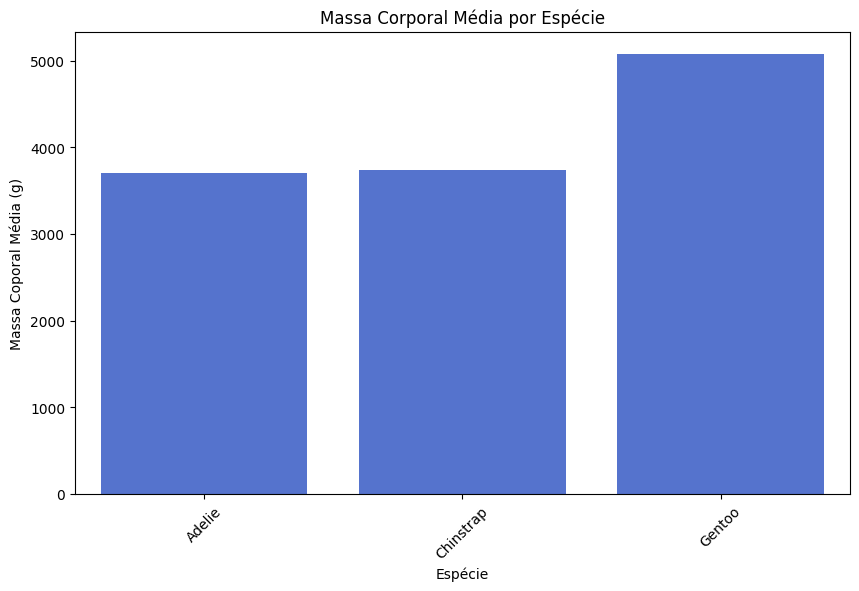

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='species', y='body_mass_g', data=massa_media, color='royalblue')
plt.title('Massa Corporal Média por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Massa Coporal Média (g)')
plt.xticks(rotation=45)
plt.show()

**Insights:** Conforme Apresentado no gráfico a espécie Gentoo apresenta ter uma massa corporal maior que as espécies Adelie e Chinstrap. 

### 3.2 Relação entre comprimento e profundidade do bico?

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

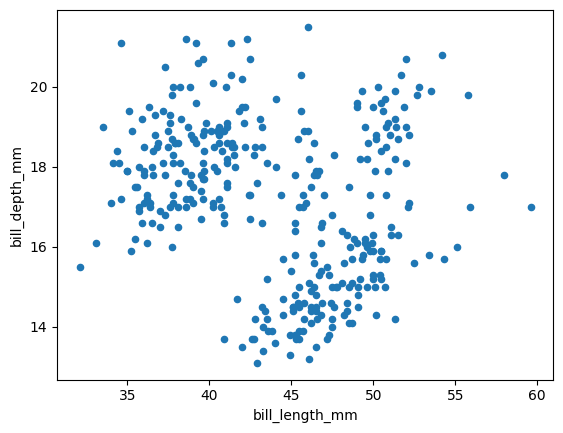

In [19]:
pinguins.plot.scatter(x='bill_length_mm', y='bill_depth_mm')

**Insights:** Conforme apresentado no gráfico acima, não podemos concluir que quanto maior o tamanho do bico maior seria a profundidade, no caso precisariamos fazer a análise mais detalhada sobre o caso. 

### 3.3 Qual sexo é mais predominante nas ilhas?

In [20]:
contagem_sexo= pinguins.groupby(['island', 'sex']).size().unstack(fill_value=0)
print(contagem_sexo)

sex        female  male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23


In [21]:
predominante_sexo = contagem_sexo.idxmax(axis=1)
print(predominante_sexo)

island
Biscoe         male
Dream          male
Torgersen    female
dtype: object


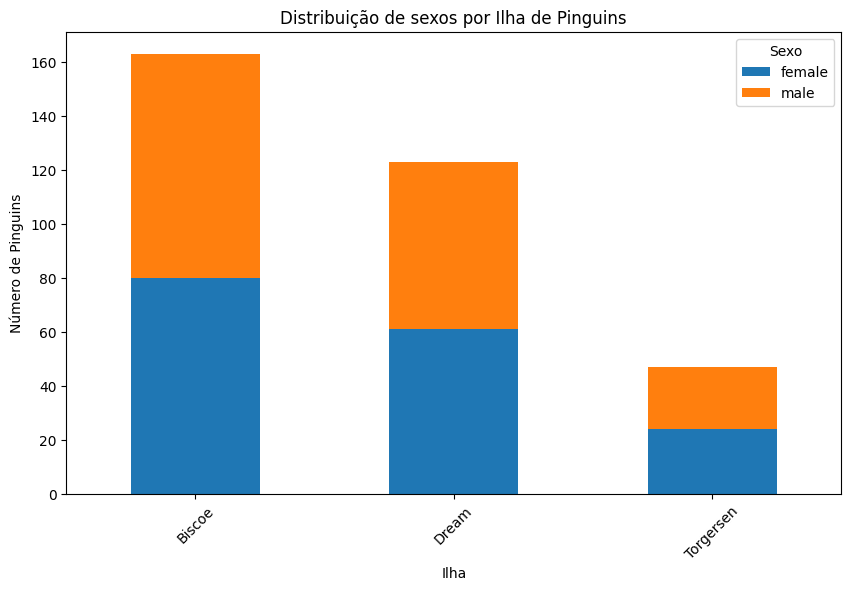

In [25]:
contagem_sexo.plot(kind='bar',stacked=True, figsize=(10,6))
plt.title('Distribuição de sexos por Ilha de Pinguins')
plt.xlabel('Ilha')
plt.ylabel('Número de Pinguins')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

**Insights:** Conforme apresentado o gráfico acima, conseguimos demonstrar que a base de dados fornecida mostra uma quantodade bem próxima em relação a cada espécie de pinguins por sexo, não havendo desbalanço com desafios de reprodução e perpetuação da espécie. 

Observou-se o gráfico acima, que a população de pinguins nas ilhas torgersen  possui uma leve quantidade comparada a outras espécies. Isso podendo indicar não sendo um ambiente mais favorável para a sobrevivência e reprodução da espécie.

A análise revelou que a distribuição de machos e fêmeas na ilha Biscoe é relativamente equilibrada, sugerindo que essa ilha oferece condições ambientais similares para ambos os sexos.
